# Time-warped PCA analysis
*Nhat Le, November 2017*

In [1]:
#import twpca
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtw
import sys

%matplotlib inline

In [9]:
# Insert path to twpca directory
sys.path.insert(0, 'C://Users/Le/Documents/MIT/Fee/twpca/twpca/')


In [26]:
import regularizers
import utils
import warp
import datasets
import model
import crossval

## Synthetic data

### Shifted Gaussians

In [27]:
def gauss_fun(t, t0, sigma):
    '''Gaussian function centered at t0'''
    return np.exp(-(t - t0)**2 / sigma**2)

gauss_fun_vec = np.vectorize(gauss_fun)

In [42]:
def run_twpca(data, ncomp):
    '''Wrapper for running twPCA.
    Returns: model: the model twPCA returns
    recons: the aligned data
    warp: the warp factor'''
    model1 = model.TWPCA(data, n_components=ncomp, warpinit='shift', warptype='shift')
    model1.fit()
    recons = model1.transform()
    warp = model1.params['warp']
    return model1, recons, warp

In [43]:
t = np.linspace(-10, 10, 150)
np.random.seed(1235)
nsamples = 100
jitters = np.random.randn(nsamples)
sort_jitters = np.sort(jitters)

array = [gauss_fun(t, t0, 1) for t0 in sort_jitters]
all_obs = np.vstack(array)

# Add noise
noise = np.random.normal(scale=0.05, size=all_obs.shape)
all_obs += noise


In [44]:
model_gauss, recons_gauss, warp_gauss = run_twpca(all_obs, 1)

100%|█████████████████████████████████████| 1000/1000 [00:07<00:00, 142.36it/s]


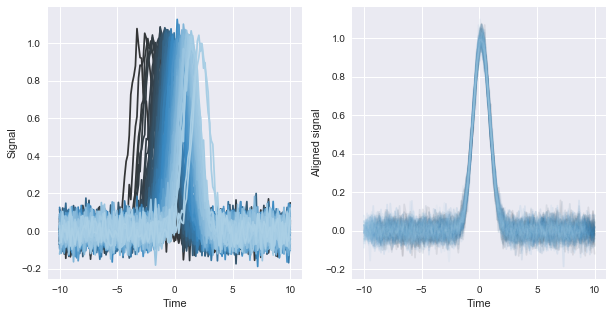

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
palette_fig1 = sns.color_palette('Blues_d', nsamples)

for i in range(nsamples):
    ax[0].plot(t, all_obs[i,:], color=palette_fig1[i]);
    ax[1].plot(t, recons_gauss[i,:,0], color=palette_fig1[i], alpha=0.1);
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Signal')
    
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Aligned signal')
plt.savefig('twpca_gaussians_100_171101_seed1234_initwarp_shift_warptype_shift2.pdf')

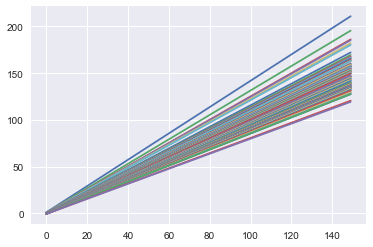

In [41]:
plt.plot(warp_gauss.T);

### Shifted and scaled gaussian

In [ ]:
data_gauss = twpca.datasets.jittered_neuron(noise=0)
plt.plot(data_gauss[2][:,:,0].T);

In [ ]:
t = np.linspace(-10, 10, 150)
np.random.seed(1235)
nsamples = 100
jitters = np.random.randn(nsamples)
scale_jitters = np.random.randn(nsamples)

sort_jitters = np.sort(jitters)

array = [gauss_fun(t, t0, sigma) for t0, sigma in zip(sort_jitters, scale_jitters)]
all_obs = np.vstack(array)

# Add noise
#noise = np.random.normal(scale=0.05, size=all_obs.shape)
#all_obs += noise

In [ ]:
plt.plot(all_obs.T);

In [ ]:
model_gauss, recons_gauss, warp_gauss = run_twpca(all_obs, 1)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
palette_fig1 = sns.color_palette('Blues_d', nsamples)

for i in range(nsamples):
    ax[0].plot(t, all_obs[i,:], color=palette_fig1[i]);
    ax[1].plot(t, recons_gauss[i,:,0], color=palette_fig1[i]);
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Signal')
    
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Aligned signal')
#plt.savefig('twpca_gaussians_100_171101_seed1234_initwarp_shift_warptype_shift.pdf')

In [ ]:
plt.plot(warp_gauss.T);

## Dynamic time-warping

In [ ]:
gauss1 = all_obs[0,:]
gauss2 = all_obs[1,:]

In [ ]:
plt.plot(gauss1)
plt.plot(gauss2)

In [ ]:
dist, cost, path = dtw.dtw(gauss1, gauss2, dist=lambda x, y: np.linalg.norm(x - y, ord=1))

In [ ]:
aligned1 = gauss1[path[0]]
aligned2 = gauss2[path[1]]
plt.plot(aligned1)
plt.plot(aligned2)

In [ ]:
model_gauss, recons_gauss, warp_gauss = run_twpca(data_gauss[2], 1)

In [ ]:
plt.plot(recons_gauss[:,:,0].T);

In [ ]:
plt.plot(data_s[2][2:7,:,0].T);

In [ ]:
model_s = twpca.TWPCA(n_components=1)
model_s.fit(data_s[2][:7,:,0])
recons_s = model_s.transform()

In [ ]:
plt.plot(recons_s[2:7,:,0].T);

In [ ]:
warp = model_s.params['warp']
plt.plot(warp.T);

In [ ]:
# Read in the neural data
short_psth = np.genfromtxt('./psth_short_all_neurons_171027.csv', delimiter=',')
long_psth = np.genfromtxt('./psth_long_all_neurons_171027.csv', delimiter=',')

t_points_short = 7
t_points_long = 9
n_neurons = 105

In [ ]:
# Reshape the short and long raw data into tensors
reshaped_short_psth = np.reshape(short_psth, (n_neurons, t_points_short, -1))
reshaped_long_psth = np.reshape(long_psth, (n_neurons, t_points_long, -1))
duration_short = reshaped_short_psth.shape[2]
duration_long = reshaped_long_psth.shape[2]

In [ ]:
# Combine short and long trials into one tensor
reshaped_short_pad = np.lib.pad(reshaped_short_psth, ((0,0), (0,0), (0,46-25)), 
                                'constant', constant_values=(0, 0))
reshaped_all_pad = np.concatenate((reshaped_short_pad, reshaped_long_psth), axis=1)

# Swap axes to feed in twpca
swapped_all = np.swapaxes(reshaped_all_pad, 0, 2)
swapped_all = np.swapaxes(swapped_all, 0, 1)

In [ ]:
# Define palette used in plotting
palette_blue = sns.palettes.color_palette('Blues', t_points_short)
palette_red = sns.palettes.color_palette('Reds', t_points_long)

In [ ]:
neuron1 = swapped_all[:,:,11]
for i in range(t_points_short):
    plt.plot(neuron1[i, :].T, color=palette_blue[i]);
    
for i in range(t_points_long):
    plt.plot(neuron1[t_points_short + i, :].T, color=palette_red[i]);    

plt.xlabel('Time')
plt.ylabel('PSTH')

In [ ]:
swapped.shape

In [ ]:
plt.plot(reshaped_short_psth[:,:19,3].T);

In [ ]:
swapped = np.swapaxes(reshaped_short_psth, 0, 2)
swapped = np.swapaxes(swapped, 0, 1)
swapped = swapped[:,:19,12]
swapped = swapped[:,:,np.newaxis]

model = twpca.TWPCA(n_components=1)
model.fit(swapped)
aligned = model.transform()

In [ ]:
swapped.shape

In [ ]:
swapped_long.shape

In [ ]:
swapped_long = np.swapaxes(reshaped_long_psth, 0, 2)
swapped_long = np.swapaxes(swapped_long, 0, 1)
model_long = twpca.TWPCA(n_components=1)
model_long.fit(swapped_long)
aligned_long = model_long.transform()

In [ ]:
model_all = twpca.TWPCA(n_components=1)
model_all.fit(swapped_all)
aligned_all = model_all.transform()

In [ ]:
V = model.params['time']
U = model.params['neuron']


In [ ]:
model.transform??

In [ ]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model.params['warp']
neuron_id = 0
before_align = swapped[:,:,neuron_id]
after_align = aligned[:,:,neuron_id]
timestamps = np.arange(a.shape[1]) * 40



for i in range(7):
    ax[0].plot(timestamps, a[i,:] * 40, color=palette_blue[i]) 
    ax[1].plot(timestamps, before_align[i,:], color=palette_blue[i]); 
    ax[2].plot(timestamps, after_align[i,:], color=palette_blue[i]);
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[2].set_xlabel('Time (ms)')

ax[0].set_ylabel('Adjusted time (ms)')
ax[1].set_ylabel('PSTH')
ax[2].set_ylabel('Aligned PSTH')
plt.savefig('short_twpca_alignment.pdf')

    
    
    

In [ ]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_long.params['warp']
neuron_id = 12
before_align = swapped_long[:,:,neuron_id]
after_align = aligned_long[:,:,neuron_id]
timestamps = np.arange(a.shape[1]) * 40

for i in range(9):
    ax[0].plot(timestamps, a[i,:] * 40, color=palette_red[i]) 
    ax[1].plot(timestamps, before_align[i,:], color=palette_red[i]);    
    ax[2].plot(timestamps, after_align[i,:], color=palette_red[i]);
    
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[2].set_xlabel('Time (ms)')

ax[0].set_ylabel('Adjusted time (ms)')
ax[1].set_ylabel('PSTH')
ax[2].set_ylabel('Aligned PSTH')

plt.savefig('long_twpca_alignment.pdf')


In [ ]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_all.params['warp']
neuron_id = 3

for i in range(16):
    ax[0].plot(a[i,:], color=palette_blue[i]) 

before_align = swapped_all[:,:,neuron_id]
for i in range(16):
    ax[1].plot(before_align[i,:], color=palette_blue[i]);    
    
after_align = aligned_all[:,:,neuron_id]
for i in range(16):
    ax[2].plot(after_align[i,:], color=palette_blue[i]);

In [ ]:
swapped_single.shape

In [ ]:
model_single

Effort to align short and long trials... 

In [ ]:
model_single.params['warp'].shape

In [ ]:
# Extract only one trial in each short/long condition
swapped_single = swapped_all[:,:,4]

# Tried: normalizing by maximum activity
#swapped_single = (swapped_single.T / np.max(swapped_single, axis=1)).T
swapped_single = np.lib.pad(swapped_single, ((0, 0), (10, 10)), 'constant', constant_values=0)

model_single = twpca.TWPCA(n_components=1)
model_single.fit(swapped_single)
aligned_single = model_single.transform()

In [ ]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
warp = model_single.params['warp']
palette_blues = sns.palettes.color_palette('Blues_d', 16)
neuron_id = 3

for i in range(warp.shape[0]):
    ax[0].plot(warp[i,:], color=palette_blues[i]) 
    ax[1].plot(swapped_single[i,:], color=palette_blues[i]);
    ax[2].plot(aligned_single[i,:], color=palette_blues[i]);

In [ ]:
model_single.params

In [ ]:
warp_lst = []
for i in range(150):
    # Extract only one trial in each short/long condition
    swapped_single = swapped_all[:t_points_short,:,i]

    print('Doing neuron #', i, '...')

    model_single = twpca.TWPCA(n_components=1)
    model_single.fit(swapped_single)
    warp_lst.append(model_single.params['warp'])
    #aligned_single = model_single.transform()

In [ ]:
warp_lst_long = []
for i in range(150):
    # Extract only one trial in each short/long condition
    swapped_single = swapped_all[t_points_short:,:,i]

    print('Doing neuron #', i, '...')

    model_single = twpca.TWPCA(n_components=1)
    model_single.fit(swapped_single)
    warp_lst_long.append(model_single.params['warp'])
    #aligned_single = model_single.transform()

In [ ]:
for warp in warp_lst:
    plt.plot(warp[0,:], 'b', alpha=0.05)
    plt.plot(warp[6,:], 'r', alpha=0.05)

In [ ]:
mean_warp = np.zeros_like(warp_lst[0])
for warp in warp_lst:
    mean_warp += warp / len(warp_lst)

In [ ]:
with sns.color_palette('Blues', 7):
    plt.plot(mean_warp.T);

In [ ]:
with sns.color_palette('Blues', 7):
    plt.plot(np.diff(mean_warp).T)

## Generated data 

In [ ]:
gen_dat_vec(time[800:900] + 2.0)

In [ ]:
def gen_dat(time):
    noise = 0 #np.random.normal(scale=0.05)
    if time < 0:
        return noise
    elif time < 8:
        return 2 * time + noise
    else:
        return max(16 - 2 * (time - 8) + noise, noise);
    
gen_dat_vec = np.vectorize(gen_dat, otypes=[np.float])

In [ ]:
def lin_ramp(tau):
    if t < 0:
        return noise
    elif t < 8:
        return 2 * t
    else:
        return np.max(16 - 2 * (t - 8), 0);
lin_ramp_vec = np.vectorize(lin_ramp)

In [ ]:
sigs.dtype

In [ ]:
#time = np.arange(-10, 20, 0.3)
time = np.linspace(-10, 20, 150)
sig1 = gen_dat_vec(time)
sig2 = gen_dat_vec(time + 2)
sig3 = gen_dat_vec(time + 4)
sig4 = gen_dat_vec(time + 6)
sig5 = gen_dat_vec(time + 8)

plt.plot(sig1, '.')
plt.plot(sig2, '.')
plt.plot(sig3)
plt.plot(sig4)
plt.plot(sig5)

In [ ]:
sigs = np.array([sig1, sig2, sig3, sig4, sig5])
model_sig = twpca.TWPCA(n_components=1)
model_sig.fit(sigs[:,:,np.newaxis])
recons = model_sig.transform()
plt.plot(recons[:,:,0].T);

In [ ]:
shifts[2]

In [ ]:
time = np.linspace(-10, 20, 150)
sig1 = gen_dat_vec(time)
sig2 = gen_dat_vec(time + 2)
sig3 = gen_dat_vec(time + 3)
sig4 = gen_dat_vec(time + shifts[3])
sig5 = gen_dat_vec(time + shifts[4])

plt.plot(time,sig1, '.')
plt.plot(time,sig2, '.')
plt.plot(time,sig3)
plt.plot(time,sig4)
plt.plot(time,sig5)

In [ ]:
sigs = np.array([sig1, sig2, sig3, sig4, sig5])
model_sig = twpca.TWPCA(n_components=1)
model_sig.fit(sigs[:,:,np.newaxis])
recons = model_sig.transform()
plt.plot(recons[:,:,0].T);

In [ ]:
t = np.arange(0,15,0.1)
interval2 = (t >= 8).astype('float') * (t < 10).astype('float')
interval1 = (t > 5).astype('float') * (t < 8).astype('float')
resp = (2 * t - 10) * interval1 + (-3 * t + 30) * interval2
plt.plot(resp)

In [ ]:
def double(tau):
    return (t - tau) * 2.0

def ramp(tau, t):
    t_trans = t - tau
    interval1 = (t_trans > 5).astype('float') * (t_trans < 8).astype('float')
    interval2 = (t_trans >= 8).astype('float') * (t_trans < 10).astype('float')
    return (2 * t_trans - 10) * interval1 + (-3 * t_trans + 30) * interval2

def ramp2(tau, t):
    t_trans = t - tau
    interval1 = (t_trans > 0).astype('float') * (t_trans < 8).astype('float')
    interval2 = (t_trans >= 8).astype('float') * (t_trans < 16).astype('float')
    return (2 * t_trans) * interval1 + (-2 * t_trans + 32) * interval2

In [ ]:
data_lin = my_jittered_neuron(feature=ramp, n_trial=100)
#plt.plot(data_lin[2][:5,:,:].T, '.');

In [ ]:
t=1

In [ ]:
model_s = twpca.TWPCA(n_components=1)
model_s.fit(data_lin[2][:5,:,:])
recons_s = model_s.transform()

In [ ]:
plt.plot(recons_s[:,:,0].T);

In [ ]:
warp = model_s.params['warp']
plt.plot(warp.T);

In [ ]:
warp.shape

In [ ]:
def my_jittered_neuron(t=None, feature=None, n_trial=61, jitter=1.0, gain=0.0, noise=0.05, seed=1234):
    """Generates a synthetic dataset of a single neuron with a jittered firing pattern.
    Parameters
    ----------
    t : array_like
        vector of within-trial timepoints
    feature : function
        produces a jittered instance of the feature (takes time shift as an input)
    n_trial : int
        number of trials
    jitter : float
        standard deviation of trial-to-trial shifts
    gain : float
        standard deviation of trial-to-trial changes in amplitude
    noise : float
        scale of additive gaussian noise
    seed : int
        seed for the random number generator
    Returns
    -------
    canonical_feature : array_like
        vector of firing rates on a trial with zero jitter
    aligned_data : array_like
        n_trial x n_time x 1 array of de-jittered noisy data
    jittered_data : array_like
        n_trial x n_time x 1 array of firing rates with jitter and noise
    """

    # default time base
    if t is None:
        t = np.linspace(-5, 20, 150)

    # default feature
    if feature is None:
        feature = lambda tau: np.exp(-(t-tau)**2)

    # noise matrix
    np.random.seed(seed)
    noise = noise*np.random.randn(n_trial, len(t))

    # generate jittered data
    gains = 1.0 + gain*np.random.randn(n_trial)
    shifts = jitter*np.random.randn(n_trial)
        
    jittered_data = np.array([g*feature(s, t) for g, s in zip(gains, shifts)]) + noise

    # generate aligned data
    aligned_data = np.array([g*feature(0, t) for g in gains]) + noise

    return feature(0, t), np.atleast_3d(aligned_data), np.atleast_3d(jittered_data), shifts, t

In [ ]:
twpca.datasets.jittered_neuron??

In [ ]:
_,_,data,shifts,t = my_jittered_neuron(feature=ramp2, n_trial=100, noise=0)
plt.plot(t, data[:5,:,0].T);

In [ ]:
model_s = twpca.TWPCA(n_components=1)
model_s.fit(data[:5,:,0])
recons_s = model_s.transform()
plt.plot(recons_s[:,:,0].T);